# test_line.ipynb

### Install

In [ ]:
pip install git+https://github.com/grmacchio/dynml.git

### Imports and Data Type Setting

In [2]:
from random import seed as seed

from matplotlib.pyplot import figure, Normalize, show
from torch import float64, linspace, meshgrid, set_default_dtype, sqrt, stack
from torch import Tensor

from dynml.examples.line import Line

In [3]:
set_default_dtype(float64)                                                      # set the default data type

### Plot Nonlinear Fibers

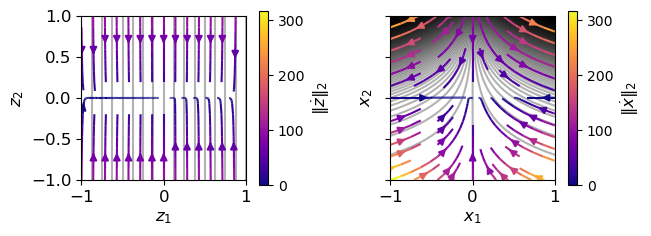

In [4]:
fos = Line()                                                                   # initialize the dynamical system

alpha = 0.3                                                                     # set the transparency of the fibers
L_l = 2.0                                                                       # set the length of the linear fiber domain
L_nl = 100.0                                                                    # set the length of the nonlinear fiber domain
num_fibers_l = 16 + 1                                                           # set the number of linear fibers
num_points_per_fiber_l = 100 + 1                                                # set the number of points per linear fiber
num_fibers_nl = 16 * 50 + 1                                                     # set the number of nonlinear fibers
num_points_per_fiber_nl = 100 * 50 + 1                                          # set the number of points per nonlinear fiber
cmap = 'plasma'                                                                 # set the colormap
density = 0.5                                                                   # set the density of the streamplot
linewidth = 1.5                                                                 # set the linewidth of the streamplot
fontsize = 12                                                                   # set the fontsize
labelsize = 12                                                                  # set the labelsize
colorbar_shrink = 0.37                                                          # set the colorbar shrink

fig = figure(constrained_layout=True)                                           # create a figure

def gen_linear_fibers(num_fibers: int, num_points_per_fiber: int,               # generate linear fibers
                      L: float) -> Tensor:
    Z1, Z2 = meshgrid(linspace(-L / 2, L / 2, num_fibers),                      # create x-axis grid
                      linspace(-L / 2, L / 2, num_points_per_fiber),            # create y-axis grid
                      indexing='ij')                                            # set the indexing
    linear_fibers = stack([Z1, Z2], dim=-1)                                     # stack the meshgrid
    return linear_fibers                                                        # return the linear fibers

ax = fig.add_subplot(1, 2, 1)                                                   # add a subplot
for fiber in gen_linear_fibers(num_fibers_l, num_points_per_fiber_l, L_l):      # iterate over the linear fibers        
    ax.plot(fiber[:, 0], fiber[:, 1], 'k', alpha=alpha)                         # plot the linear fibers
x1 = linspace(-L_l / 2, L_l / 2, 100)                                           # create x1-axis grid
x2 = linspace(-L_l / 2, L_l / 2, 100)                                           # create x2-axis grid
X2, X1 = meshgrid(x1, x2, indexing='ij')                                        # create the meshgrid
U1_l = -fos.lambda1 * X1                                                        # compute the linear U1 component
U2_l = -fos.lambda2 * X2                                                        # compute the linear U2 component
speed_l = sqrt(U1_l**2 + U2_l**2)                                               # compute the linear speed
U1_nl = -fos.lambda1 * X1 + fos.C * X1 * X2                                     # compute the nonlinear U1 component
U2_nl = -fos.lambda2 * X2                                                       # compute the nonlinear U2 component
speed_nl = sqrt(U1_nl**2 + U2_nl**2)                                            # compute the nonlinear speed
vmax = max(speed_l.max(), speed_nl.max())                                       # compute the maximum speed
plot = ax.streamplot(x1.numpy(), x2.numpy(), U1_l.numpy(), U2_l.numpy(),        # plot the linear phase portrait
                    density=density, color=speed_l.numpy(), cmap=cmap,          # set the density, color, and colormap
                    linewidth=linewidth,                                        # set the linewidth
                    norm=Normalize(vmin=0.0, vmax=vmax.item()))                 # set the normalization
colorbar = fig.colorbar(plot.lines, ax=ax, shrink=colorbar_shrink)              # create the colorbar
colorbar.set_label('$\\|\\dot{z}\\|_2$', fontsize=fontsize)                     # set the colorbar label
ax.set_aspect('equal')                                                          # set the aspect ratio
ax.set_xlabel('$z_1$', fontsize=fontsize)                                       # set the x-axis label
ax.set_ylabel('$z_2$', fontsize=fontsize)                                       # set the y-axis label
ax.set_xlim(-L_l / 2, L_l / 2)                                                  # set the x-axis limits
ax.set_ylim(-L_l / 2, L_l / 2)                                                  # set the y-axis limits
ax.tick_params(axis='both', labelsize=labelsize)                                # set the tick parameters

ax = fig.add_subplot(1, 2, 2)                                                   # add a subplot
linear_fibers = gen_linear_fibers(num_fibers_nl, num_points_per_fiber_nl, L_nl) # generate linear fibers
nonlinear_fibers = fos.h(linear_fibers)                                         # generate nonlinear fibers
for fiber in nonlinear_fibers:                                                  # iterate over the nonlinear fibers
    ax.plot(fiber[:, 0], fiber[:, 1], 'k', alpha=alpha)                         # plot the nonlinear fibers
plot = ax.streamplot(X1.numpy(), X2.numpy(), U1_nl.numpy(), U2_nl.numpy(),      # plot the nonlinear phase portrait
                    density=density, color=speed_nl.numpy(), cmap=cmap,         # set the density, color, and colormap
                    linewidth=linewidth,                                        # set the linewidth
                    norm=Normalize(vmin=0.0, vmax=vmax.item()))                 # set the normalization
colorbar = fig.colorbar(plot.lines, ax=ax, shrink=0.37)                         # create the colorbar
colorbar.set_label('$\\|\\dot{x}\\|_2$', fontsize=12)                           # set the colorbar label
ax.set_aspect('equal')                                                          # set the aspect ratio
ax.set_xlabel('$x_1$', fontsize=fontsize)                                       # set the x-axis label
ax.set_ylabel('\n$x_2$', fontsize=fontsize)                                     # set the y-axis label
ax.set_xlim(-L_l / 2, L_l / 2)                                                  # set the x-axis limits
ax.set_ylim(-L_l / 2, L_l / 2)                                                  # set the y-axis limits
ax.set_yticklabels([])                                                          # set the y-axis tick labels
ax.tick_params(axis='both', labelsize=labelsize)                                # set the tick parameters

show()                                                                          # display the figure